In [1]:
import pandas as pd

df_sentiment = pd.read_csv('/content/fear_greed_index.csv')

print("First 5 rows of the sentiment data:")
print(df_sentiment.head())

print("\nConcise summary of the sentiment data:")
df_sentiment.info()

First 5 rows of the sentiment data:
    timestamp  value classification        date
0  1517463000     30           Fear  2018-02-01
1  1517549400     15   Extreme Fear  2018-02-02
2  1517635800     40           Fear  2018-02-03
3  1517722200     24   Extreme Fear  2018-02-04
4  1517808600     11   Extreme Fear  2018-02-05

Concise summary of the sentiment data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


In [2]:
df_trader = pd.read_csv('/content/historical_data.csv')

print("First 5 rows of the historical trader data:")
print(df_trader.head())

print("\nConcise summary of the historical trader data:")
df_trader.info()

First 5 rows of the historical trader data:
                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
2       144.09   1150.63  BUY  02-12-2024 22:50     1002.518996       Buy   
3       142.98   1142.04  BUY  02-12-2024 22:50     1146.558564       Buy   
4         8.73     69.75  BUY  02-12-2024 22:50     1289.488521       Buy   

   Closed PnL                                   Transaction 

In [3]:
df_sentiment['date'] = pd.to_datetime(df_sentiment['date'])
df_sentiment['sentiment_date'] = df_sentiment['date'].dt.date

df_trader['Timestamp IST'] = pd.to_datetime(df_trader['Timestamp IST'], format='%d-%m-%Y %H:%M')
df_trader['trading_date'] = df_trader['Timestamp IST'].dt.date

df_merged = pd.merge(df_trader, df_sentiment, how='left', left_on='trading_date', right_on='sentiment_date')

print("First 5 rows of the merged data:")
print(df_merged.head())

print("\nConcise summary of the merged data:")
df_merged.info()

First 5 rows of the merged data:
                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side       Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY 2024-12-02 22:50:00        0.000000       Buy   
1        16.00    127.68  BUY 2024-12-02 22:50:00      986.524596       Buy   
2       144.09   1150.63  BUY 2024-12-02 22:50:00     1002.518996       Buy   
3       142.98   1142.04  BUY 2024-12-02 22:50:00     1146.558564       Buy   
4         8.73     69.75  BUY 2024-12-02 22:50:00     1289.488521       Buy   

   Closed PnL  ... Crossed       Fee      Trade ID     Time

In [4]:
print(f"Number of rows before dropping NaNs: {len(df_merged)}")
df_merged.dropna(subset=['classification', 'value'], inplace=True)
print(f"Number of rows after dropping NaNs: {len(df_merged)}")

print("\nFirst 5 rows of the merged data after handling NaNs:")
print(df_merged.head())

print("\nConcise summary of the merged data after handling NaNs:")
df_merged.info()

Number of rows before dropping NaNs: 211224
Number of rows after dropping NaNs: 211218

First 5 rows of the merged data after handling NaNs:
                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side       Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY 2024-12-02 22:50:00        0.000000       Buy   
1        16.00    127.68  BUY 2024-12-02 22:50:00      986.524596       Buy   
2       144.09   1150.63  BUY 2024-12-02 22:50:00     1002.518996       Buy   
3       142.98   1142.04  BUY 2024-12-02 22:50:00     1146.558564       Buy   
4         8.73     69.75  BUY 2

In [5]:
def calculate_win_rate(x):
    """Calculates the win rate (percentage of positive PnL trades)."""
    return (x > 0).sum() / len(x) * 100

performance_by_sentiment = df_merged.groupby('classification').agg(
    avg_closed_pnl=('Closed PnL', 'mean'),
    median_closed_pnl=('Closed PnL', 'median'),
    win_rate=('Closed PnL', calculate_win_rate),
    avg_trade_size_usd=('Size USD', 'mean')
)

print("Trader Performance by Sentiment Classification:")
print(performance_by_sentiment)


Trader Performance by Sentiment Classification:
                avg_closed_pnl  median_closed_pnl   win_rate  \
classification                                                 
Extreme Fear         34.537862                0.0  37.060748   
Extreme Greed        67.892861                0.0  46.494299   
Fear                 54.290400                0.0  42.076750   
Greed                42.743559                0.0  38.482794   
Neutral              34.307718                0.0  39.699093   

                avg_trade_size_usd  
classification                      
Extreme Fear           5349.731843  
Extreme Greed          3112.251565  
Fear                   7816.109931  
Greed                  5736.884375  
Neutral                4782.732661  


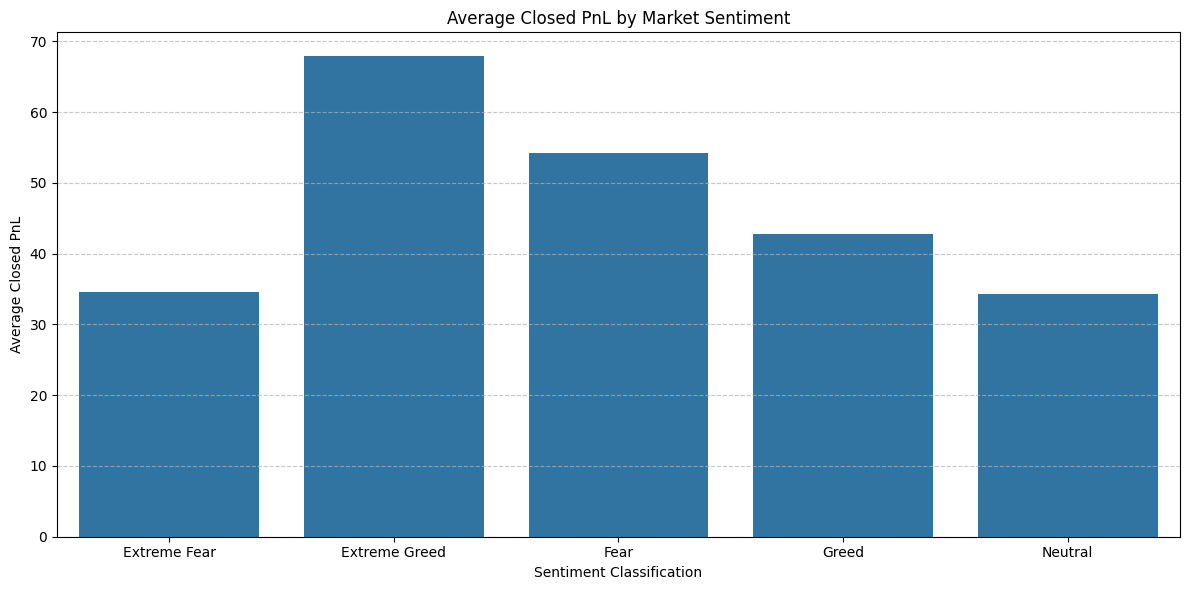

/tmp/ipython-input-380442765.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='classification', y='Closed PnL', data=df_merged, palette='viridis')


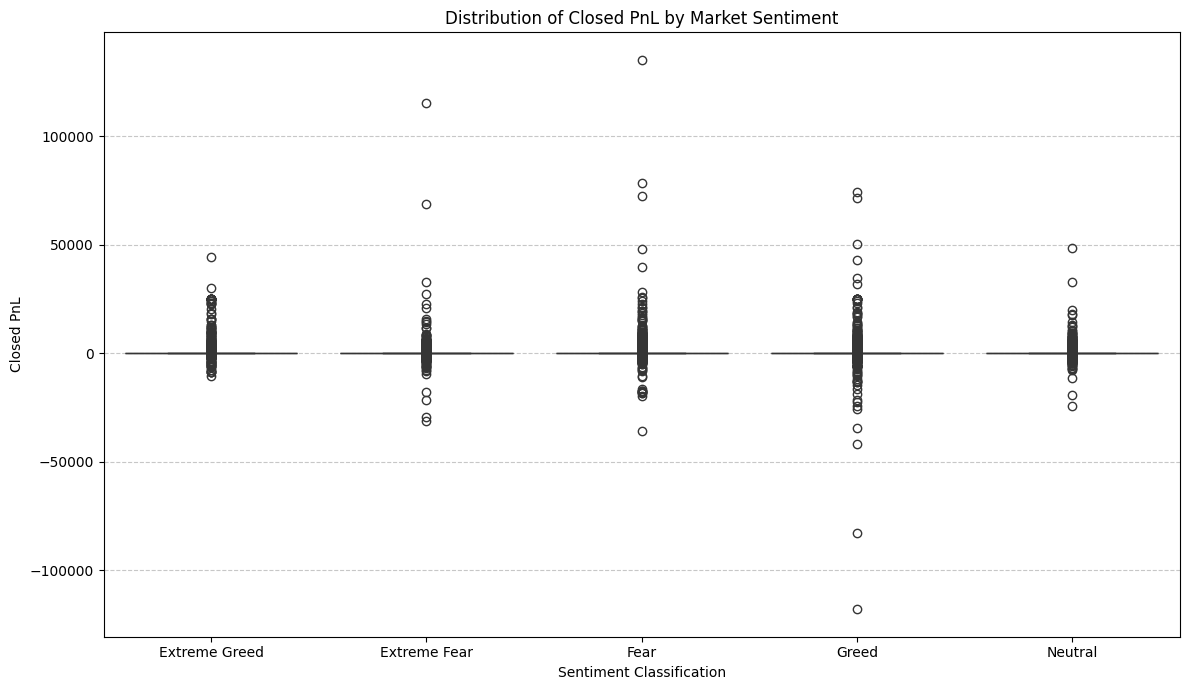

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x=performance_by_sentiment.index, y='avg_closed_pnl', data=performance_by_sentiment)
plt.title('Average Closed PnL by Market Sentiment')
plt.xlabel('Sentiment Classification')
plt.ylabel('Average Closed PnL')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 7))
sns.boxplot(x='classification', y='Closed PnL', data=df_merged, palette='viridis')
plt.title('Distribution of Closed PnL by Market Sentiment')
plt.xlabel('Sentiment Classification')
plt.ylabel('Closed PnL')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

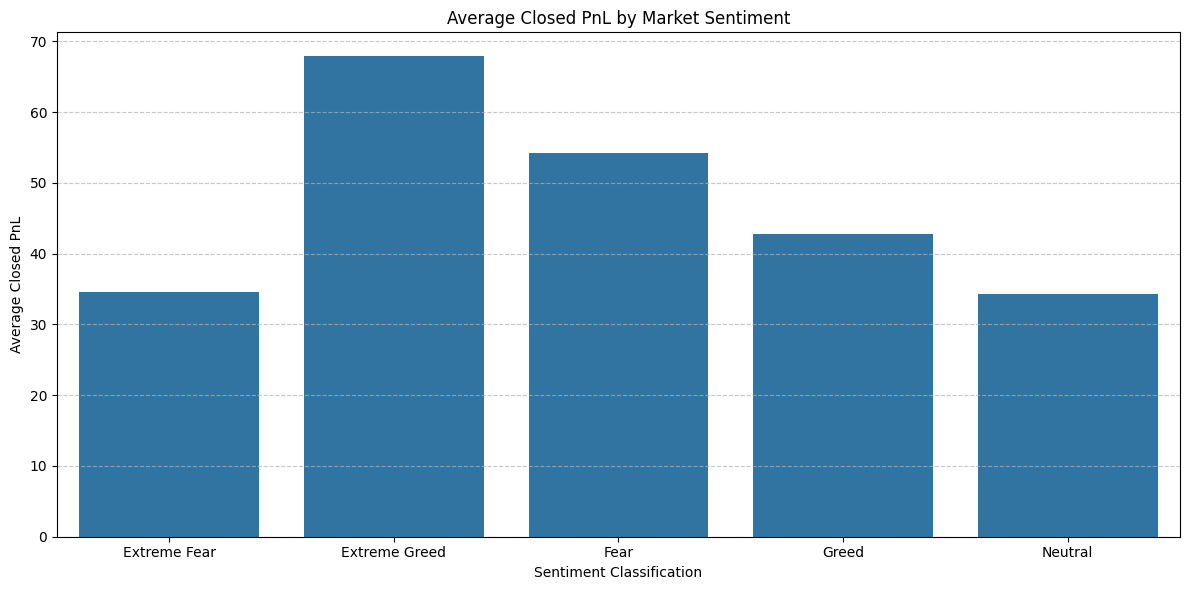

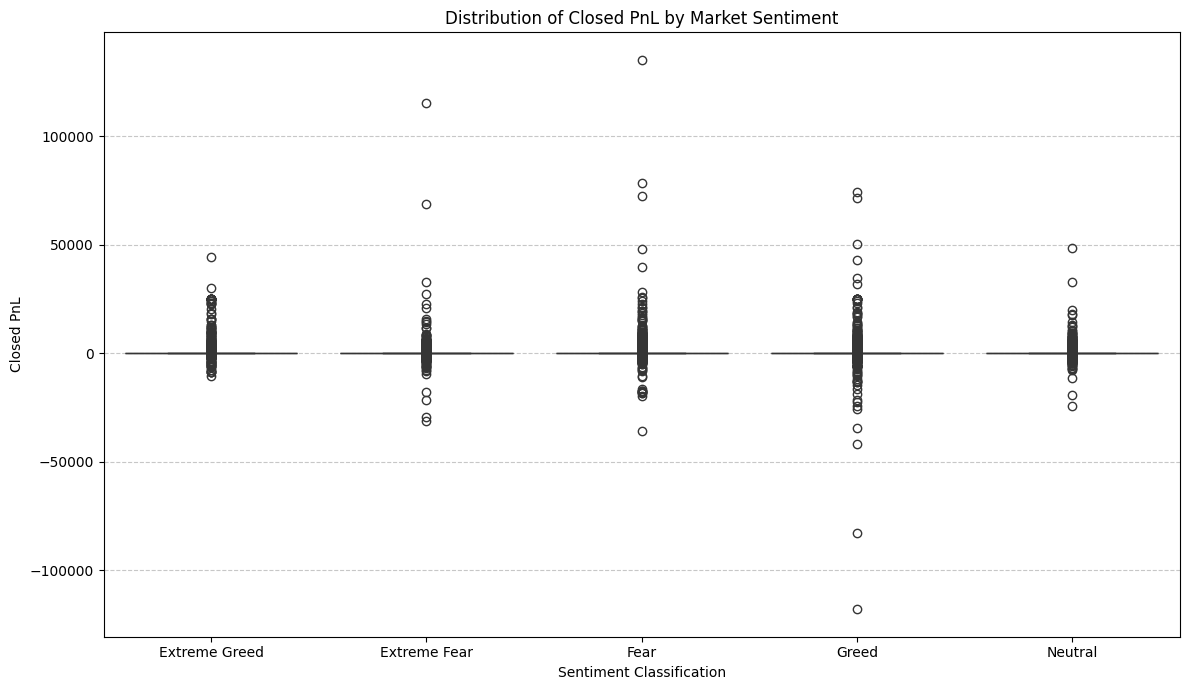

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x=performance_by_sentiment.index, y='avg_closed_pnl', data=performance_by_sentiment)
plt.title('Average Closed PnL by Market Sentiment')
plt.xlabel('Sentiment Classification')
plt.ylabel('Average Closed PnL')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 7))
sns.boxplot(x='classification', y='Closed PnL', data=df_merged, palette='viridis', hue='classification', legend=False)
plt.title('Distribution of Closed PnL by Market Sentiment')
plt.xlabel('Sentiment Classification')
plt.ylabel('Closed PnL')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [8]:
print("Trader Performance by Sentiment Classification:")
print(performance_by_sentiment)

Trader Performance by Sentiment Classification:
                avg_closed_pnl  median_closed_pnl   win_rate  \
classification                                                 
Extreme Fear         34.537862                0.0  37.060748   
Extreme Greed        67.892861                0.0  46.494299   
Fear                 54.290400                0.0  42.076750   
Greed                42.743559                0.0  38.482794   
Neutral              34.307718                0.0  39.699093   

                avg_trade_size_usd  
classification                      
Extreme Fear           5349.731843  
Extreme Greed          3112.251565  
Fear                   7816.109931  
Greed                  5736.884375  
Neutral                4782.732661  


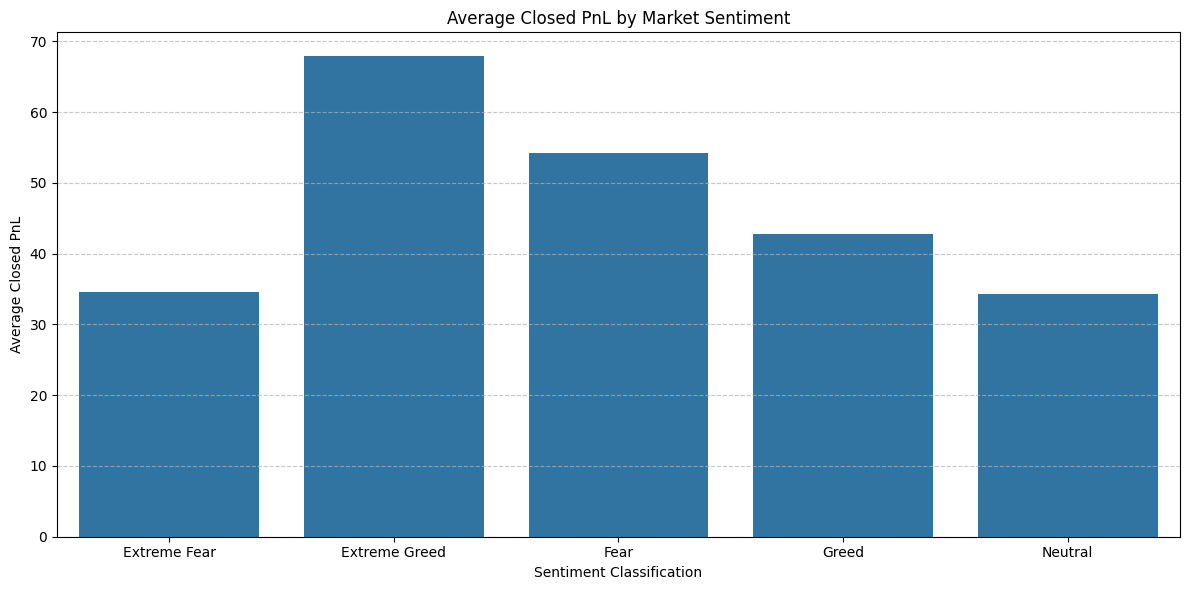

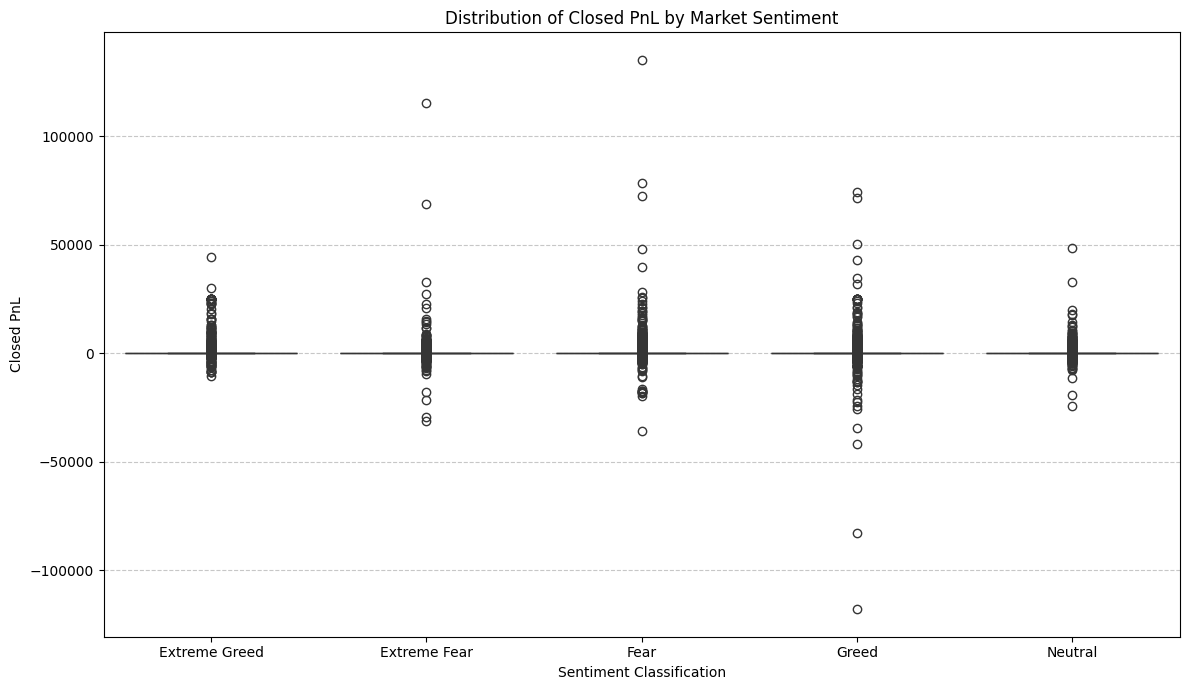

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Re-displaying the bar plot for Average Closed PnL by Market Sentiment
plt.figure(figsize=(12, 6))
sns.barplot(x=performance_by_sentiment.index, y='avg_closed_pnl', data=performance_by_sentiment)
plt.title('Average Closed PnL by Market Sentiment')
plt.xlabel('Sentiment Classification')
plt.ylabel('Average Closed PnL')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Re-displaying the box plot for Distribution of Closed PnL by Market Sentiment
plt.figure(figsize=(12, 7))
sns.boxplot(x='classification', y='Closed PnL', data=df_merged, palette='viridis', hue='classification', legend=False)
plt.title('Distribution of Closed PnL by Market Sentiment')
plt.xlabel('Sentiment Classification')
plt.ylabel('Closed PnL')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()